# Breast Cancer Machine Learning Model

## Introduction

The goal of this project is to build a classification machine learning model trained on diagnostic breast cancer data. The trained machine learning model will be used to predict whether a cell is malignant or benign. 

We want to answer the following questions:
#### <i>1) Which characteristics of a breast cell nucleus are the most predictive of a malignant cell?</i><br>
#### <i>2) Which classification machine learning model offers better performance: Random Forest or XGBoost?</i>

| 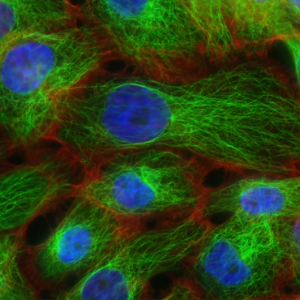 |
|:--:| 
| *Stress Fibers and Microtubules in Human Breast Cancer Cells. Created by Christina Stuelten, Carole Parent, 2011* |
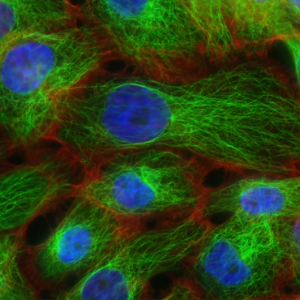

## Breast Cancer Cell Dataset

For this project, I will use a public Kaggle dataset of diagnostic breast cancer data: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

The dataset can also be found in UC Irvine's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

According to the dataset documentation, the dataset contains features related to characteristics of cell nuclei. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.<sup>1</sup>

The dataset has:

<b>569 rows</b> - each row represents a different cell nuclei

<b>33 columns</b>

|       Column Name       | Data Type | Description |
| :---------------------- | :--------: | :---------- |
| ID number               | int64  | ID of a cell nuclei |
| Diagnosis                 | object       | M = Malignant, B = Benign     |
| Radius                   | float64       | Distance from center of nuclei to perimeter         |
| Texture          | float64      | Standard deviation of gray-scale values         |
| Perimeter                  | float64       | Distance around perimeter of nuclei           |
| Area            | float64       | Area of nuclei           |
| Smoothness             | float64 | Local variation in radius lengths           |
| Compactness                | float64       | Compactness = (perimeter<sup>2</sup>) / (area - 1.0)          |
| Concavity                     | float64      | Severity of concave portions of the contour          |
| Concave points                  | float64       | Number of concave portions of the contour           |
| Symmetry                   | float64       | Measure of nuclei symmetry           |
| Fractal dimension                    | float64       | "Coastline approximation" - 1           |

All columns besides ID number and diagnosis have three features: A mean, standard error, and "worst" (i.e. mean of 3 largest values). For example, the radius column, corresponding to the measured nuclei radius, has three columns: Radius_mean, Radius_se, and Radius_worst.

All features (besides ID number and diagnosis) have four significant digits.

## Import Python Libraries

In [1]:
# Numerical Operations and Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing Numerical Dataset Values
from sklearn.preprocessing import StandardScaler

# Display All of the Columns in DataFrames
pd.set_option('display.max_columns', None)

# Machine Learning Models
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Metrics and Other Helpful Functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Suppress Specific Warnings to Improve Readability
import warnings

## Import the Diagnostic Breast Cancer Dataset

In [2]:
# Convert the CSV file to a DataFrame object
breast_cancer_df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

## Initial Data Exploration
Let's start by examining the first 10 rows of the data

In [3]:
breast_cancer_df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


The final column, "Unnamed: 32", seems to only have NaN values.

Next, we'll examine information about the columns and their data types.

In [4]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Out of 569 rows, no column is missing data besides the "Unnamed: 32" column which only has null values. 

## Removing Irrelevant Columns

We will remove this column along with the "ID number column" since neither will be useful for our analysis. 

In [5]:
# Remove irrelevant columns from the DataFrame
breast_cancer_df.drop(columns=['id', 'Unnamed: 32'], axis=1, inplace=True)

Let's confirm the columns no longer exist.

In [6]:
# Confirm columns were successfully removed
breast_cancer_df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Great! The columns have been removed. We now want to confirm that our data does not have any remaining null values.

In [7]:
# Count the number of null values in each column
breast_cancer_df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Each column has zero null values. 

## Determine Class Balance

Each cell nucleus is either benign (i.e. non-cancerous) or malignant (i.e. cancerous). We should determine how many are benign and how many are malignant. 

In [8]:
# Print the total number of each type of cell nucleus
print(breast_cancer_df['diagnosis'].value_counts())

print()

# Print the percentage of each type of cell nucleus
print(breast_cancer_df['diagnosis'].value_counts(normalize=True))

diagnosis
B    357
M    212
Name: count, dtype: int64

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


* 357 cell nuclei were benign (62.7417%)
* 212 cell nuclei were malignant (37.2583%)

We do not have a significant (>90%) class imbalance, so we should not have class issues with classification modeling. We may use stratification to replicate this class balance in the training data. 

## Examine Descriptive Statistics

Let's obtain descriptive statistics of our numerical features.

In [9]:
# Obtain descriptive statistics of DataFrame
breast_cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The max area_mean is 2501.000000 while the max fractional_dimension_mean is 0.09744. In other words, the large differences in numbers means we should standardize our data. Standardizing the data will prevent models from overprioritizing features simply because they have larger numbers. 

## Standardize the Data

We can standardize the data by subtracting the mean of the data from the data and then dividing by the standard deviation of the data (also known as z-score standardization). 

We should first separate the categorical target variable from the numerical features, standardize the numerical features, and then rejoin the dataset back together. Standarizing a categorical variable will lead to errors.

In [10]:
# Separate dependent 'diagnosis' variable from the independent features
y = breast_cancer_df['diagnosis']
x = breast_cancer_df.drop(columns=['diagnosis'])

# Standardize the DataFrame with only numerical features
scaler = StandardScaler()
numerical_features_standardized_df = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Rejoin the categorical column to the now standardized numerical features
breast_cancer_standardized_df = pd.concat([y, numerical_features_standardized_df], axis=1)

# Examine the first 10 rows of the standardized DataFrame
breast_cancer_standardized_df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,M,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,-0.255070,-0.592662,-0.321304,-0.289258,0.156347,0.445544,0.160025,-0.069124,0.134119,0.486846,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,M,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,0.149883,-0.804940,0.155410,0.298627,-0.909030,-0.651568,-0.310141,-0.228089,-0.829666,-0.611218,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,M,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,0.643623,0.290561,0.490051,0.233722,0.588031,0.268933,-0.232554,0.435349,-0.688004,0.611669,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,M,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,-0.356850,-0.389818,-0.227743,-0.352403,-0.436677,0.533290,0.120568,0.075243,0.107482,-0.017363,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,M,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,-0.388250,0.693345,-0.409420,-0.360764,0.036008,2.609587,1.509848,0.409395,-0.321136,2.377346,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


Our numerical data is now standardized, which will be important for modeling. 

Next, we will visualize the relationships between our features to assist in the feature engineering process. Feature engineering is where we select, transform, and extract features to help build a more predictive model.

## Visualizing Feature Relationships For Benign vs Malignant Cell Nuclei with Boxplots

We have 30 features. We can set up box plots in groups of 10 to get a sense of how the data is distributed and what outliers exist.


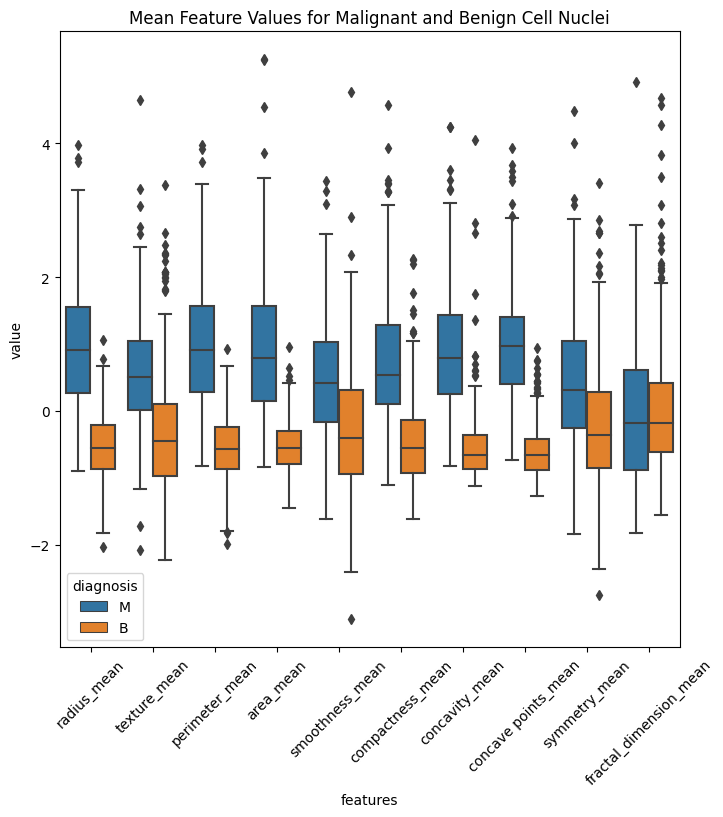

In [11]:
# Create 3 subsets, each with ten numerical features
first_subset_df = pd.concat([y, numerical_features_standardized_df.iloc[:, :10]], axis=1)
first_subset_df = pd.melt(first_subset_df, id_vars = 'diagnosis', var_name='features', value_name='value')
second_subset_df = pd.concat([y, numerical_features_standardized_df.iloc[:, 10:20]], axis=1)
second_subset_df = pd.melt(second_subset_df, id_vars = 'diagnosis', var_name='features', value_name='value')
third_subset_df = pd.concat([y, numerical_features_standardized_df.iloc[:, 20:30]], axis=1)
third_subset_df = pd.melt(third_subset_df, id_vars = 'diagnosis', var_name='features', value_name='value')

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the first subset of boxplots
sns.boxplot(x='features', y='value', hue='diagnosis', data=first_subset_df)
plt.title('Mean Feature Values for Malignant and Benign Cell Nuclei')
plt.xticks(rotation=45)
plt.show()

We notice right away that the median lines for the standardized orange benign mean values tend to be lower than the median lines for the blue malignant values. 

A few observations:
* The average radius of a malignant breast cell is larger than a benign cell. 
* Other metrics related to cell size such as perimeter and area also share this relationship.
* However, there are outlier benign cells that just happen to have the average radius of a malignant cell
* The mean fractal dimension has very similar means and therefore is probably not a good predictive feature

Let's take a look at the boxplots for standard error of features.

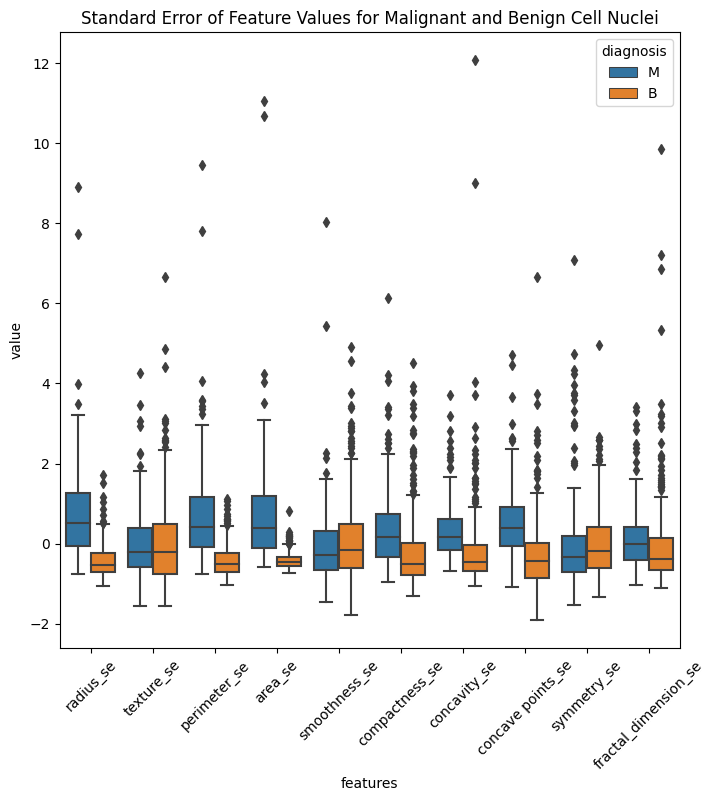

In [12]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the first subset of boxplots
sns.boxplot(x='features', y='value', hue='diagnosis', data=second_subset_df)
plt.title('Standard Error of Feature Values for Malignant and Benign Cell Nuclei')
plt.xticks(rotation=45)
plt.show()

The features in this subset seem to be less distict and therefore less predictive. Area_se, perimeter_se, and radius_se could have some predictive value, although we again notice a fair number of outlier benign cells that have similar sizes to malignant cells. 

In addition, a small number of malignant cells have a smaller size typically associated with benign cells, as observed by the lower whisker of the blue malignant boxplot covering
the median value of the orange benign boxplot.

The best predictive model for this classification problem will need to take multiple features into consideration.

Let's look at the "worst" values (i.e mean of the 3 largest values) for the features.

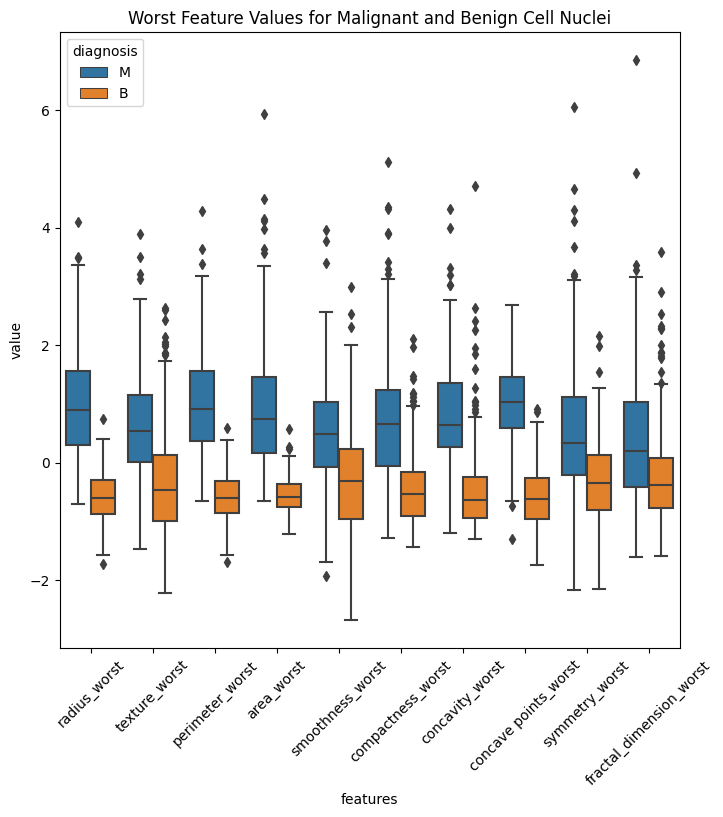

In [13]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the first subset of boxplots
sns.boxplot(x='features', y='value', hue='diagnosis', data=third_subset_df)
plt.title('Worst Feature Values for Malignant and Benign Cell Nuclei')
plt.xticks(rotation=45)
plt.show()

* Radius_worst may have some predictive value
* Area_worst also seems promising for predictive value
* There are quite a few outlier values for both benign and malignant cells, typically higher-end outliers

## Visualizing Feature Relationships For Benign vs Malignant Cell Nuclei with Swarm Plots

The boxplots indicated that we have a fair number of outliers in our dataset of 569 cell nuclei. Since our dataset is relatively small, we can use swarm plots to more clearly see the distributions of benign and malignant cell nuclei for values of each feature. The swarm plots will more clearly show where outliers are mixing with typical values for the other diagnosis.

CPU times: user 6.57 s, sys: 11.7 ms, total: 6.58 s
Wall time: 6.6 s


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

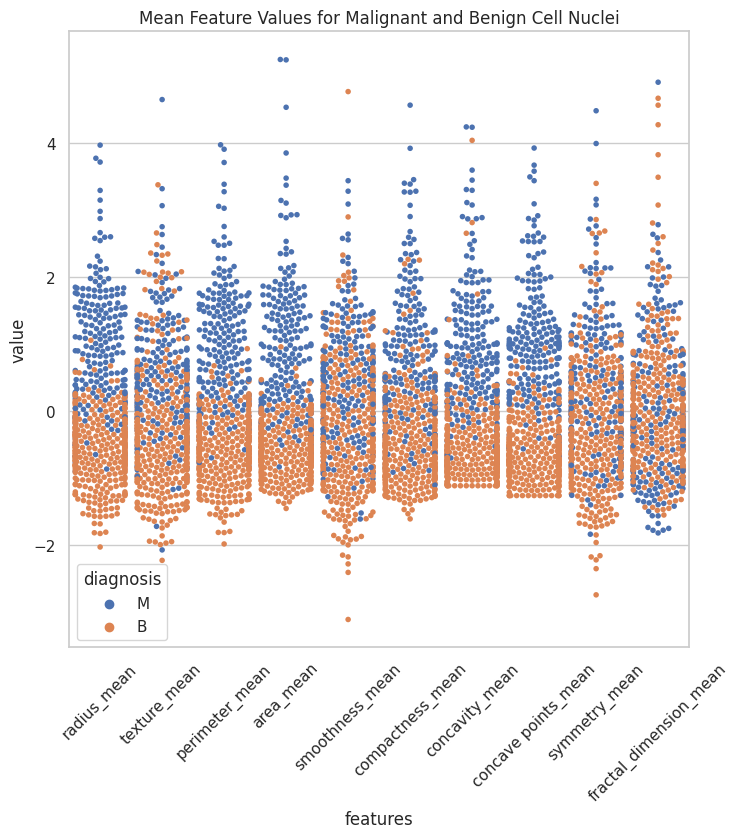

In [14]:
%%time
# Set the figure size
plt.figure(figsize=(8, 8))

# Change settings to improve visibility of plot
sns.set(style='whitegrid')

# Suppress future warnings for readability
warnings.simplefilter(action='ignore', category=FutureWarning)

# Suppress warnings related to overlapping points in the plot
warnings.simplefilter(action='ignore', category=UserWarning)

# Create swarmplot for first subset
sns.swarmplot(x='features', y='value', hue='diagnosis', data=first_subset_df, size=4)
plt.title('Mean Feature Values for Malignant and Benign Cell Nuclei')
plt.xticks(rotation=45)

The swarmplot more clearly shows how outliers are mixing in with typical values for the other diagnosis.

* In the fractal_dimension_mean plot, malignant and benign observations are distributed throughout the plot. This even distribution indicates once again that this feature lacks predictive power
* There is a greater degree of separation in the radius_mean plot. We again highlight that mean nuclei radius has apparent predictive power.

Let's plot swarmplots for two remaining subsets.

CPU times: user 22 s, sys: 8.47 ms, total: 22 s
Wall time: 22 s


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

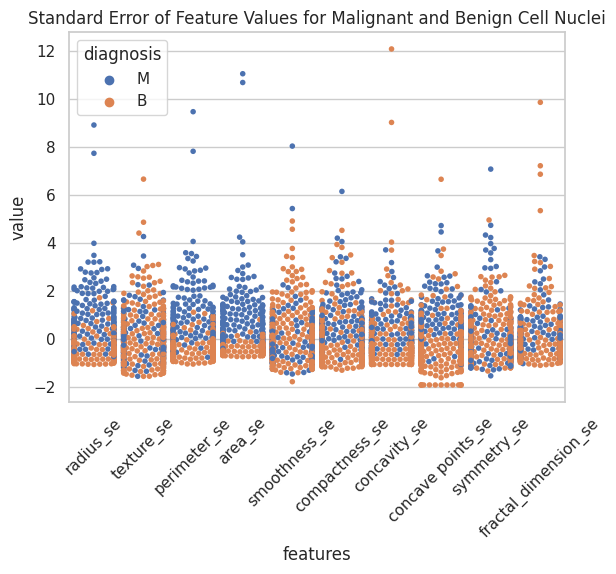

In [15]:
%%time
# Create swarmplot for second subset
sns.swarmplot(x='features', y='value', hue='diagnosis', data=second_subset_df, size=4)
plt.title('Standard Error of Feature Values for Malignant and Benign Cell Nuclei')
plt.xticks(rotation=45)

* The area_se feature looks like the most promising predictive feature of all standard error features

CPU times: user 11.2 s, sys: 3.97 ms, total: 11.2 s
Wall time: 11.2 s


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

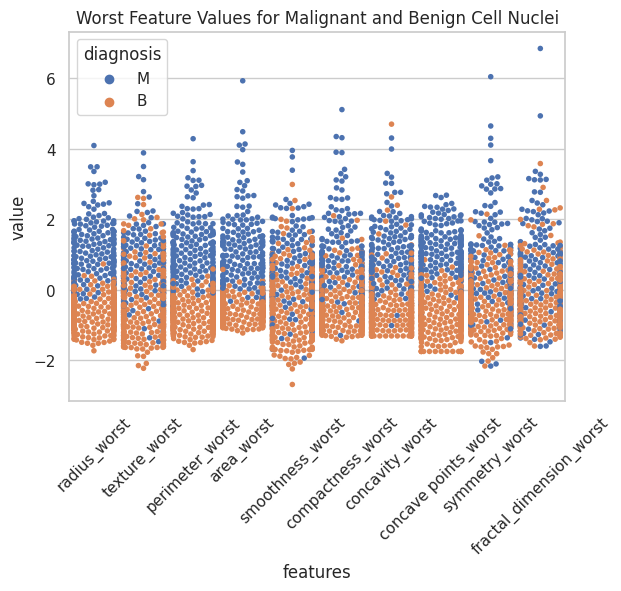

In [16]:
%%time
# Create swarmplot for third subset
sns.swarmplot(x='features', y='value', hue='diagnosis', data=third_subset_df, size=4)
plt.title('Worst Feature Values for Malignant and Benign Cell Nuclei')
plt.xticks(rotation=45)

* The area_worst feature seems highly predictive

Now that our swarm plots have been made, we'll turn warnings back on.

In [17]:
# Re-enable future warnings and user warnings
warnings.resetwarnings()

## Feature Correlation Heatmap

Now that we have an idea of which features might be most predictive for our classification model, we can build a correlation heatmap to better understand how features are correlated with each other.

Understanding feature correlations is an important step for setting up the feature engineering phase. 

<Axes: >

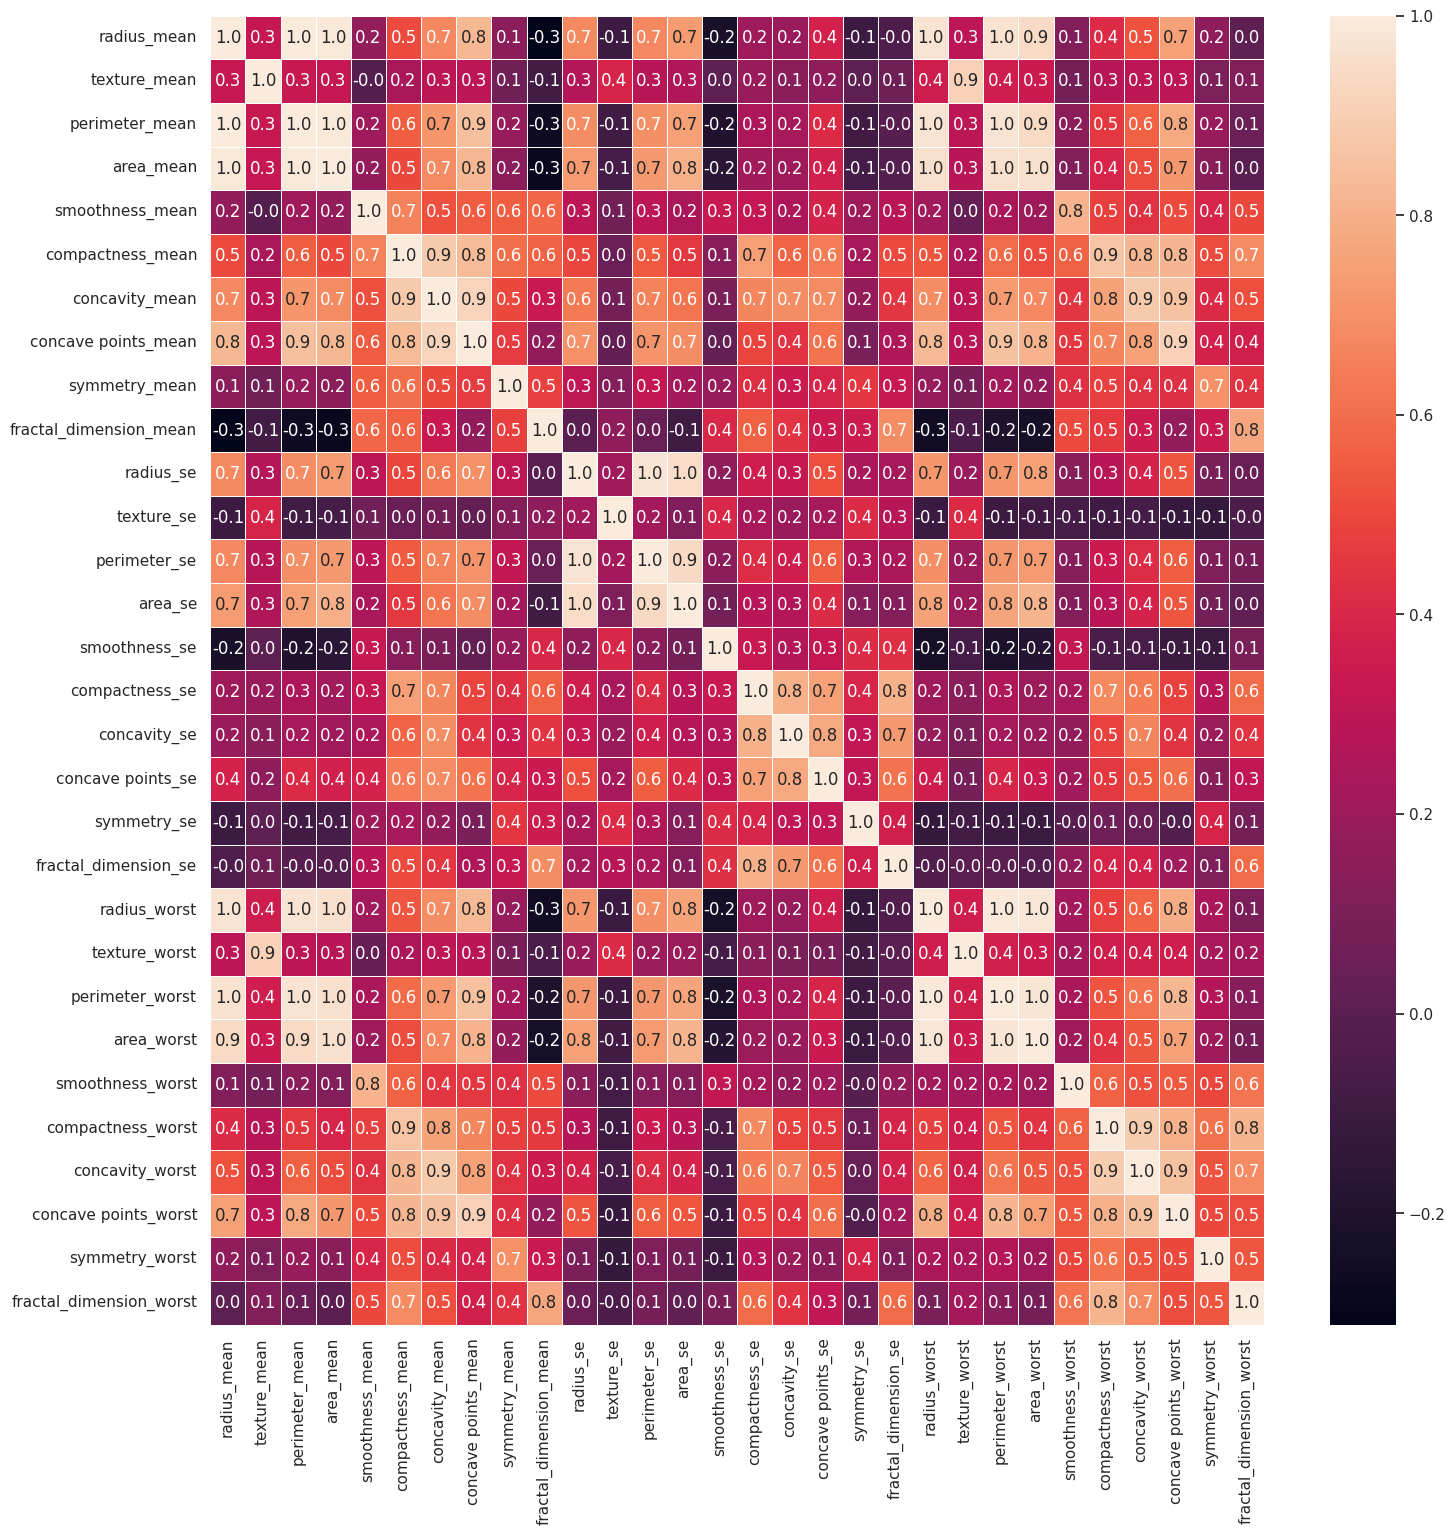

In [18]:
# Plot the feature correlation heatmap 
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(numerical_features_standardized_df.corr(), annot=True, linewidth=0.5, fmt='0.1f', ax=ax)

The heatmap compares each of the 30 features with all 30 features, including each feature with itself. Therefore, there are 900 values in the heatmap.

* Each feature has a 1.0 (i.e. 100%) correlation with itself
* Correlations have a range of [-1, 1]

We want to identify different features with high correlations with each other.


## References

1) Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.